In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
# Save the result into a csv file
df = pd.read_csv('lda_topic_distribution.csv')

In [10]:
# Calculate the average distribution of topics for each genre

# Convert the strings in the "Genre" column into Python lists in order to be able to iterate 
# through them and count the occurrences of each genre
df['Genres'] = df['Genres'].apply(ast.literal_eval)

# Flatten the list of genres and count their occurrences
genre_counts = {}
for genres_list in df['Genres']:
    for genre in genres_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Sort the dictionary of genres by counts in descending order
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

# Create a list of genres in descending order for indexing
ordered_list=[x for x in sorted_genre_counts]

In [11]:
# Create a new DataFrame to store the aggregated results
result_df = pd.DataFrame(index=ordered_list, columns=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10'])
# Display the DataFrame 
result_df

Topic 1 Topic 2 Topic 3 Topic 4 Topic 5 Topic 6 Topic 7 Topic 8  \
Rock              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Pop               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Pop/Rock          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Heavy Metal       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Hip Hop           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...               ...     ...     ...     ...     ...     ...     ...     ...   
Pagode            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Forró             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Kizomba           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Electro Swing     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Regional          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

              Topic 9 Topic 10  
Rock              NaN      NaN  
Pop               NaN      NaN  
Pop/Rock          NaN      NaN  
Heavy Metal       NaN      NaN  
Hip Hop           NaN      NaN  
...               ...      ...  
Pagode            NaN      NaN  
Forró             NaN      NaN  
Kizomba           NaN      NaN  
Electro Swing     NaN      NaN  
Regional          NaN      NaN  

[75 rows x 10 columns]

In [12]:
# Iterate over genres and calculate the average distribution of topics for each genre
# For each genre:
#   1. Collect rows where the genre is present
#   2. Calculate the mean value for each topic in the selected rows
#   3. Append the average distribution to the result_df

for genre in ordered_list:
    genre_rows = df[df['Genres'].apply(lambda x: genre in x)]
    avg_distribution = genre_rows[['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10']].mean()
    result_df.loc[genre] = round(avg_distribution, 4)
# Display the DataFrame 
result_df    

Topic 1 Topic 2 Topic 3 Topic 4 Topic 5 Topic 6 Topic 7 Topic 8  \
Rock           0.1534  0.0324  0.0702  0.0562  0.0862  0.1482  0.2558   0.035   
Pop            0.2179  0.0314   0.108  0.0345  0.0548  0.1216  0.2785  0.0332   
Pop/Rock       0.2029  0.0263  0.0763  0.0391   0.068  0.1429  0.2818  0.0333   
Heavy Metal     0.114  0.0243  0.0421   0.064  0.1397  0.1491  0.1669  0.0326   
Hip Hop        0.0825  0.1101   0.119  0.0696  0.0368  0.0516  0.2072  0.0233   
...               ...     ...     ...     ...     ...     ...     ...     ...   
Pagode         0.2461  0.0165  0.1012  0.0235  0.0391  0.1844  0.2418  0.0389   
Forró          0.1474  0.0511  0.1046  0.0588  0.0835  0.1196  0.2166  0.0276   
Kizomba        0.2821  0.0115  0.1319  0.0117  0.0257  0.0326  0.3177  0.0607   
Electro Swing  0.0599  0.0543  0.1714  0.1011  0.1416  0.3076  0.1174  0.0221   
Regional       0.6288  0.0021  0.0506  0.0863   0.085  0.0021  0.0894  0.0512   

              Topic 9 Topic 10  
Rock           0.1339   0.0287  
Pop            0.0752   0.0449  
Pop/Rock        0.104   0.0253  
Heavy Metal    0.2398   0.0275  
Hip Hop        0.0644   0.2356  
...               ...      ...  
Pagode         0.1027   0.0057  
Forró          0.1492   0.0415  
Kizomba        0.1245   0.0015  
Electro Swing  0.0098   0.0148  
Regional       0.0021   0.0021  

[75 rows x 10 columns]

In [13]:
# Add genre frequencies from the sorted dictionary to the resulting DataFrame
result_df['Frequency']=sorted_genre_counts.values()
# Display the DataFrame 
result_df

Topic 1 Topic 2 Topic 3 Topic 4 Topic 5 Topic 6 Topic 7 Topic 8  \
Rock           0.1534  0.0324  0.0702  0.0562  0.0862  0.1482  0.2558   0.035   
Pop            0.2179  0.0314   0.108  0.0345  0.0548  0.1216  0.2785  0.0332   
Pop/Rock       0.2029  0.0263  0.0763  0.0391   0.068  0.1429  0.2818  0.0333   
Heavy Metal     0.114  0.0243  0.0421   0.064  0.1397  0.1491  0.1669  0.0326   
Hip Hop        0.0825  0.1101   0.119  0.0696  0.0368  0.0516  0.2072  0.0233   
...               ...     ...     ...     ...     ...     ...     ...     ...   
Pagode         0.2461  0.0165  0.1012  0.0235  0.0391  0.1844  0.2418  0.0389   
Forró          0.1474  0.0511  0.1046  0.0588  0.0835  0.1196  0.2166  0.0276   
Kizomba        0.2821  0.0115  0.1319  0.0117  0.0257  0.0326  0.3177  0.0607   
Electro Swing  0.0599  0.0543  0.1714  0.1011  0.1416  0.3076  0.1174  0.0221   
Regional       0.6288  0.0021  0.0506  0.0863   0.085  0.0021  0.0894  0.0512   

              Topic 9 Topic 10  Frequency  
Rock           0.1339   0.0287      63686  
Pop            0.0752   0.0449      33563  
Pop/Rock        0.104   0.0253      26356  
Heavy Metal    0.2398   0.0275      21744  
Hip Hop        0.0644   0.2356      20900  
...               ...      ...        ...  
Pagode         0.1027   0.0057         29  
Forró          0.1492   0.0415         18  
Kizomba        0.1245   0.0015          7  
Electro Swing  0.0098   0.0148          6  
Regional       0.0021   0.0021          2  

[75 rows x 11 columns]

In [14]:
# Save the result into a csv file
result_df.to_csv('lda_average_topic_distribution_across_genres.csv')

In [15]:
# Filter result_df to include only rows where the 'Frequency' column is greater than 2000
result_df = result_df[result_df['Frequency'] > 2000]

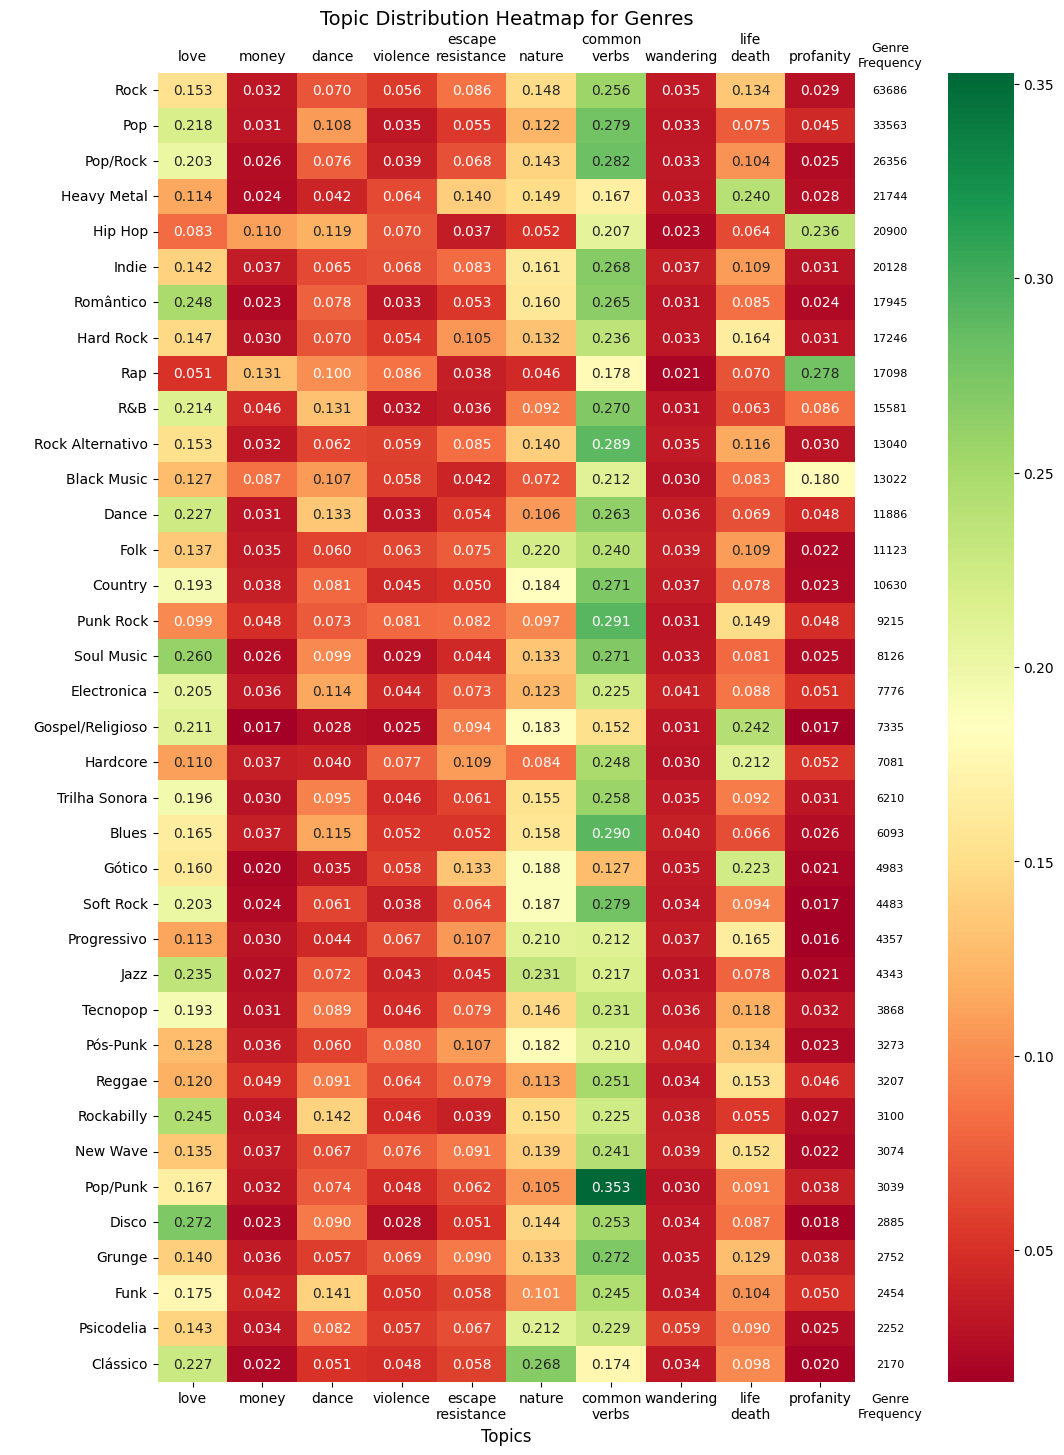

In [16]:
# Plot the heatmap of topic distribution across genres 
plt.figure(figsize=(12, 17))
heatmap = sns.heatmap(result_df.iloc[:, :-1].astype(float), cmap="RdYlGn", annot=True, fmt=".3f", cbar_kws={'location': 'right', 'pad': 0.1})

# Add genre frequency annotations
for i in range(result_df.shape[0]):
    heatmap.text(result_df.shape[1] - 0.5, i + 0.5, str(result_df['Frequency'][i]), ha='center', va='center', color='black', fontsize=8)

# Add x-axis labels to the top
plt.tick_params(axis='x', labeltop=True)

# Set plot title and labels
plt.title('Topic Distribution Heatmap for Genres', fontsize=14)
plt.xlabel('Topics', fontsize=12)
plt.ylabel(' ', fontsize=12)
plt.xticks([pos + 0.5 for pos in range(10)], ['love','money','dance','violence','escape\nresistance','nature','common\nverbs','wandering','life\ndeath','profanity'], fontsize=10)
plt.text(result_df.shape[1]-0.5, -0.5, 'Genre\nFrequency', ha='center', va='center', fontsize=9)
plt.text(result_df.shape[1]-0.5, result_df.shape[0]+0.7, 'Genre\nFrequency', ha='center', va='center', fontsize=9)

plt.show()

In [19]:
# Rename the columns
result_df.rename(columns={'Topic 1': 'love', 'Topic 2': 'money/financial success', 'Topic 3': 'dance/party', 'Topic 4':'violence', 'Topic 5':'escape and resistance', 
                          'Topic 6':'nature', 'Topic 7':'common verbs', 'Topic 8':'wandering', 'Topic 9':'life and death, suffering', 'Topic 10':'profanity'}, inplace=True)
# Plot the average distribution of topics across frequent genres
fig, ax = plt.subplots(figsize=(15, 25))
result_df.iloc[::-1, :-1].plot(kind='barh', stacked=True, ax=ax, cmap='tab10')
for i, value in enumerate(result_df['Frequency'].iloc[::-1]):
    ax.text(1.07, i, f'{value}', va='center')
ax.text(1.092, -1, 'Genre\nFrequency', va='top', ha='center')
plt.title('Average Distribution of Topics across Genres', size='xx-large')
plt.xlabel('Average Topic Distribution', size='xx-large')
plt.ylabel(' ', size='xx-large')
plt.legend(loc='center left', bbox_to_anchor=(1.09, 0.92), fontsize='x-large', framealpha = 0)

plt.show()

In [20]:
result_df = result_df.drop("Frequency", axis='columns')

In [62]:
def ordered_topics_across_genres(row):
    sorted_values = row.sort_values(ascending=False)
    top_labels = sorted_values.index.tolist()
    print("{}: {}".format(row.name, top_labels))
    # Open the file in append mode and write the information
    with open("ordered_topics_across_genres_descending.txt", "a") as file:
        file.write("{}: {}\n".format(row.name, top_labels))

# Apply the function row-wise
result_df.apply(ordered_topics_across_genres, axis=1)

Rock: ['common verbs', 'love', 'nature', 'life and death, suffering', 'escape and resistance', 'dance/party', 'violence', 'wandering', 'money/financial success', 'profanity']
Pop: ['common verbs', 'love', 'nature', 'dance/party', 'life and death, suffering', 'escape and resistance', 'profanity', 'violence', 'wandering', 'money/financial success']
Pop/Rock: ['common verbs', 'love', 'nature', 'life and death, suffering', 'dance/party', 'escape and resistance', 'violence', 'wandering', 'money/financial success', 'profanity']
Heavy Metal: ['life and death, suffering', 'common verbs', 'nature', 'escape and resistance', 'love', 'violence', 'dance/party', 'wandering', 'profanity', 'money/financial success']
Hip Hop: ['profanity', 'common verbs', 'dance/party', 'money/financial success', 'love', 'violence', 'life and death, suffering', 'nature', 'escape and resistance', 'wandering']
Indie: ['common verbs', 'nature', 'love', 'life and death, suffering', 'escape and resistance', 'violence', 'dan

Rock                None
Pop                 None
Pop/Rock            None
Heavy Metal         None
Hip Hop             None
Indie               None
Romântico           None
Hard Rock           None
Rap                 None
R&B                 None
Rock Alternativo    None
Black Music         None
Dance               None
Folk                None
Country             None
Punk Rock           None
Soul Music          None
Electronica         None
Gospel/Religioso    None
Hardcore            None
Trilha Sonora       None
Blues               None
Gótico              None
Soft Rock           None
Progressivo         None
Jazz                None
Tecnopop            None
Pós-Punk            None
Reggae              None
Rockabilly          None
New Wave            None
Pop/Punk            None
Disco               None
Grunge              None
Funk                None
Psicodelia          None
Clássico            None
dtype: object

In [58]:
def highest_lowest_genres_across_topics(column):
    sorted_column = column.sort_values()
    highest_indices = list(sorted_column.index[-7:]) # Indices of 7 highest values
    lowest_indices = list(sorted_column.index[:7])  # Indices of 7 lowest values
    # Reverse the lists
    highest_indices.reverse()

    # Printing the information
    print("Topic: {}".format(column.name))
    print("Highest 7 genres:", highest_indices)
    print("Lowest 7 genres:", lowest_indices)
    print("\n")
    # Open the file in append mode and write the information
    with open("highest_and_lowest_genres_across_topics.txt", "a") as file:
        file.write("Topic: {}\n".format(column.name))
        file.write("Highest 7 genres: {}\n".format(highest_indices))
        file.write("Lowest 7 genres: {}\n".format(lowest_indices))
        file.write("\n")

# Apply the function column-wise
result_df.apply(highest_lowest_genres_across_topics)

Topic: love
Highest 7 genres: ['Disco', 'Soul Music', 'Romântico', 'Rockabilly', 'Jazz', 'Clássico', 'Dance']
Lowest 7 genres: ['Rap', 'Hip Hop', 'Punk Rock', 'Hardcore', 'Progressivo', 'Heavy Metal', 'Reggae']


Topic: money/financial success
Highest 7 genres: ['Rap', 'Hip Hop', 'Black Music', 'Reggae', 'Punk Rock', 'R&B', 'Funk']
Lowest 7 genres: ['Gospel/Religioso', 'Gótico', 'Clássico', 'Disco', 'Romântico', 'Soft Rock', 'Heavy Metal']


Topic: dance/party
Highest 7 genres: ['Rockabilly', 'Funk', 'Dance', 'R&B', 'Hip Hop', 'Blues', 'Electronica']
Lowest 7 genres: ['Gospel/Religioso', 'Gótico', 'Hardcore', 'Heavy Metal', 'Progressivo', 'Clássico', 'Grunge']


Topic: violence
Highest 7 genres: ['Rap', 'Punk Rock', 'Pós-Punk', 'Hardcore', 'New Wave', 'Hip Hop', 'Grunge']
Lowest 7 genres: ['Gospel/Religioso', 'Disco', 'Soul Music', 'R&B', 'Romântico', 'Dance', 'Pop']


Topic: escape and resistance
Highest 7 genres: ['Heavy Metal', 'Gótico', 'Hardcore', 'Pós-Punk', 'Progressivo', 'Hard 

love                         None
money/financial success      None
dance/party                  None
violence                     None
escape and resistance        None
nature                       None
common verbs                 None
wandering                    None
life and death, suffering    None
profanity                    None
dtype: object